In [2]:
#Tensorflow Import and GPU recognition
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3810183274020776522, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5231063434103374605
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6005519535906498314
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11150726272
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7005341220233844735
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!unzip '/content/drive/My Drive/Progetto Advanced Machine Learning/fruits.zip' -d '/content'

unzip:  cannot find or open /content/drive/My Drive/Progetto Advanced Machine Learning/fruits.zip, /content/drive/My Drive/Progetto Advanced Machine Learning/fruits.zip.zip or /content/drive/My Drive/Progetto Advanced Machine Learning/fruits.zip.ZIP.


In [4]:
!unzip '/content/drive/My Drive/fruits.zip' -d /

Streaming output truncated to the last 5000 lines.
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_16_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_17_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_181_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_182_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_183_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_184_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_185_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_186_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_187_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_188_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_189_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_18_100.jpg  
  inflating: /fruits-360_dat

In [0]:
#Importing Keras and other useful libs
import os
from os import listdir, makedirs
from os.path import join, exists, expanduser
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from glob import glob
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#Defining dataset path and saving it for future usage
path = '/fruits-360_dataset/fruits-360'
os.listdir(path)

['papers', 'Training', 'readme.md', 'LICENSE', 'test-multiple_fruits', 'Test']

In [6]:
#Number of pictures in Training folder
training_files = glob(os.path.join(path,'Training', '*/*.jpg'))
image_num = len(training_files)
print("Number of Images: ",image_num)

Number of Images:  60498


In [7]:
#Number of pictures in Test Folder
testing_files = glob(os.path.join(path, 'Test', '*/*.jpg'))
img_num = len(testing_files)
print("Number of Images: ", img_num)

Number of Images:  20622


In [8]:
#Print category details
image_count = []
class_names = []
print('{:18s}'.format('Class'), end='')
print('Count:')
print('-'*24)
for folder in os.listdir(os.path.join(path,'Training')):
  folder_count = len(os.listdir(os.path.join(path,'Training',folder)))
  image_count.append(folder_count)
  class_names.append(folder)
  print('{:20s}'.format(folder), end='')
  print(folder_count)
print('-'*24)
print('Number of Classes:', len(class_names))
print('Average number of images per Class: ', np.array(image_count).mean())

Class             Count:
------------------------
Nectarine           492
Apricot             492
Walnut              735
Lemon               492
Papaya              492
Potato Sweet        450
Apple Golden 1      492
Peach 2             738
Apple Red 2         492
Plum                447
Pear Williams       490
Mango Red           426
Tomato 4            479
Kiwi                466
Ginger Root         99
Peach               492
Grape Blue          984
Granadilla          490
Tamarillo           490
Limes               490
Mangostan           300
Apple Red Delicious 490
Cherry Rainier      738
Pomelo Sweetie      450
Apple Braeburn      492
Passion Fruit       490
Pitahaya Red        490
Pineapple           490
Huckleberry         490
Grape White 4       471
Cantaloupe 1        492
Apple Golden 2      492
Onion Red           450
Apple Golden 3      481
Apple Pink Lady     456
Physalis with Husk  492
Redcurrant          492
Pepper Yellow       666
Tomato Yellow       459
Hazelnut       

In [9]:
#Definitive paths
train_out_path = os.path.join(path,'Training')
test_out_path = os.path.join(path, 'Test')
print(train_out_path)
print(test_out_path)

/fruits-360_dataset/fruits-360/Training
/fruits-360_dataset/fruits-360/Test


In [0]:
#2 Approach: Inception v3 pre-trained
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

In [0]:
#Implementing some augmentation to avoid overfitting on the training generator
train_datagenerator = ImageDataGenerator(rotation_range=30, zoom_range=0.2, horizontal_flip=True,preprocessing_function=preprocess_input, validation_split=0.2)
test_datagenerator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [12]:
#Creating Batches
train_batches = train_datagenerator.flow_from_directory(train_out_path, target_size=(224, 224), color_mode="rgb", class_mode="categorical" ,  batch_size=32,subset='training', seed = 20052020)
val_batches = train_datagenerator.flow_from_directory(directory=train_out_path, target_size=(224, 224), color_mode="rgb", class_mode="categorical" ,  batch_size=32, subset='validation', seed = 20052020)
test_batches = test_datagenerator.flow_from_directory(directory=test_out_path, target_size=(224, 224), color_mode="rgb", class_mode="categorical" ,  batch_size=32, shuffle=False)

Found 48431 images belonging to 120 classes.
Found 12067 images belonging to 120 classes.
Found 20622 images belonging to 120 classes.


In [0]:
resnet50_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
#Using pretrained
for layer in resnet50_model.layers:
  layer.trainable=False
#Adding Layers at the top
top = resnet50_model.output
top = Flatten()(top)
top = Dense(128, activation='relu', name='fc_1')(top)
top = Dropout(0.3)(top)

#Adding Classification layer with softmax activation function(needed for categorical predictions)
predictor = Dense(120 ,activation='softmax', name='predictor', kernel_regularizer=keras.regularizers.l2(0.0001))(top)
resnet50_model = Model(inputs=resnet50_model.input, outputs=predictor)

In [18]:
resnet50_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [0]:
#Compiling the model
resnet50_model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
#Training and Validating the model: Round 1
wait = 1
epochs = 15
model_name='ResNet50v2'
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',patience=wait)

In [0]:
import datetime
save_path = '/content/drive/My Drive/'
save_path += model_name
save_path += str(datetime.datetime.now()) + '.hdf5'
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=False, monitor='val_loss', mode='min')

In [38]:
trainingMdl = resnet50_model.fit(train_batches, epochs=10 , verbose=1, shuffle=True, validation_data=val_batches, callbacks=[model_checkpoint,early_stopping])

Epoch 1/10
1514/1514 [==============================] - 874s 577ms/step - loss: 1.4202 - accuracy: 0.6796 - val_loss: 0.2553 - val_accuracy: 0.9503
Epoch 2/10
1514/1514 [==============================] - 840s 555ms/step - loss: 0.1902 - accuracy: 0.9603 - val_loss: 0.1392 - val_accuracy: 0.9747
Epoch 3/10
1514/1514 [==============================] - 840s 555ms/step - loss: 0.0877 - accuracy: 0.9839 - val_loss: 0.0960 - val_accuracy: 0.9793
Epoch 4/10
1514/1514 [==============================] - 845s 558ms/step - loss: 0.0566 - accuracy: 0.9912 - val_loss: 0.0880 - val_accuracy: 0.9797
Epoch 5/10
1514/1514 [==============================] - 839s 554ms/step - loss: 0.0413 - accuracy: 0.9942 - val_loss: 0.0658 - val_accuracy: 0.9840
Epoch 6/10
1514/1514 [==============================] - 839s 554ms/step - loss: 0.0347 - accuracy: 0.9949 - val_loss: 0.0727 - val_accuracy: 0.9842


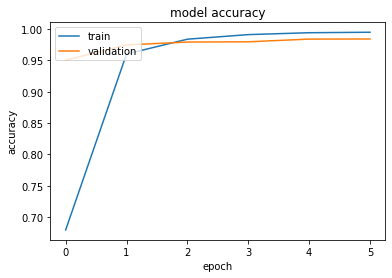

In [40]:
#Accuracy Plot
plt.plot(trainingMdl.history['accuracy'])
plt.plot(trainingMdl.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

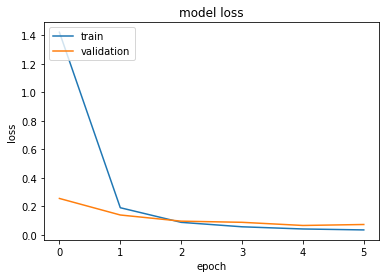

In [41]:
#Loss Plot
plt.plot(trainingMdl.history['loss'])
plt.plot(trainingMdl.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    
    img_tensor = np.expand_dims(img_tensor, axis=0)         
    img_tensor /= 255.                                      

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [43]:
#Predictions
predictionModel = tf.keras.models.load_model(filepath=save_path)
predictions, labels = [] , []
test_steps = test_batches.n // 32

for i in range(test_steps):
  img, classes = test_batches.next()
  classes = np.argmax(classes, axis=1)
  pred = np.argmax(predictionModel.predict(img), axis=1)
  predictions.extend(pred.astype('int32'))
  labels.extend(classes.astype('int32'))

labels = np.array(labels)
predictions = np.array(predictions)

print('First 25 results:')
print('  - Actuals    : ', labels[:25])
print('  - Predictions: ', predictions[:25])
correct_pred_count = (labels == predictions).sum()
test_acc = correct_pred_count / len(labels)
print('We got %d of %d correct (or %.3f accuracy)' % (correct_pred_count, len(labels), test_acc))

First 25 results:
  - Actuals    :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  - Predictions:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
We got 20314 of 20608 correct (or 0.986 accuracy)


In [0]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mtx = confusion_matrix(labels, predictions)

In [0]:
#Function for plotting Custom Confusion Matrix
from google.colab import files
import itertools
def plot_cm(conf_mtx, labels, normalize=False, cmap=plt.cm.Reds):
  if normalize:
    conf_mtx = conf_mtx.astype('float') / conf_mtx.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix")
  
  print(conf_mtx)

  leftmargin = 0.5 # inches
  rightmargin = 0.5 # inches
  categorysize = 0.5 # inches
  figwidth = leftmargin + rightmargin + (len(labels) * categorysize)

  f = plt.figure(figsize=(figwidth,figwidth))

  ax = f.add_subplot(111)
  ax.set_aspect(1)
  f.subplots_adjust(left=leftmargin/figwidth, right=1-rightmargin/figwidth, top=0.94, bottom=0.1)

  res = ax.imshow(conf_mtx, interpolation='nearest', cmap=cmap)

  plt.title("Confusion Matrix")
  plt.colorbar(res)
  ax.set_xticks(range(len(labels)))
  ax.set_yticks(range(len(labels)))
  ax.set_xticklabels(labels, rotation=45, ha='right')
  ax.set_yticklabels(labels)

  fmt = '.2f' if normalize else 'd'
  thresh = conf_mtx.max() / 2.
  for i, j in itertools.product(range(conf_mtx.shape[0]), range(conf_mtx.shape[1])):
    plt.text(j, i, format(conf_mtx[i, j], fmt),
    horizontalalignment="center",
    color="white" if conf_mtx[i, j] > thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.savefig("confusion_matrixResNet50.png")

Confusion Matrix
[[160   0   0 ...   0   0   0]
 [  0 148   0 ...   0   0   0]
 [  0   0 163 ...   0   0   0]
 ...
 [  0   0   0 ... 127   0   0]
 [  0   0   0 ...   0 153   0]
 [  0   0   0 ...   0   0 235]]


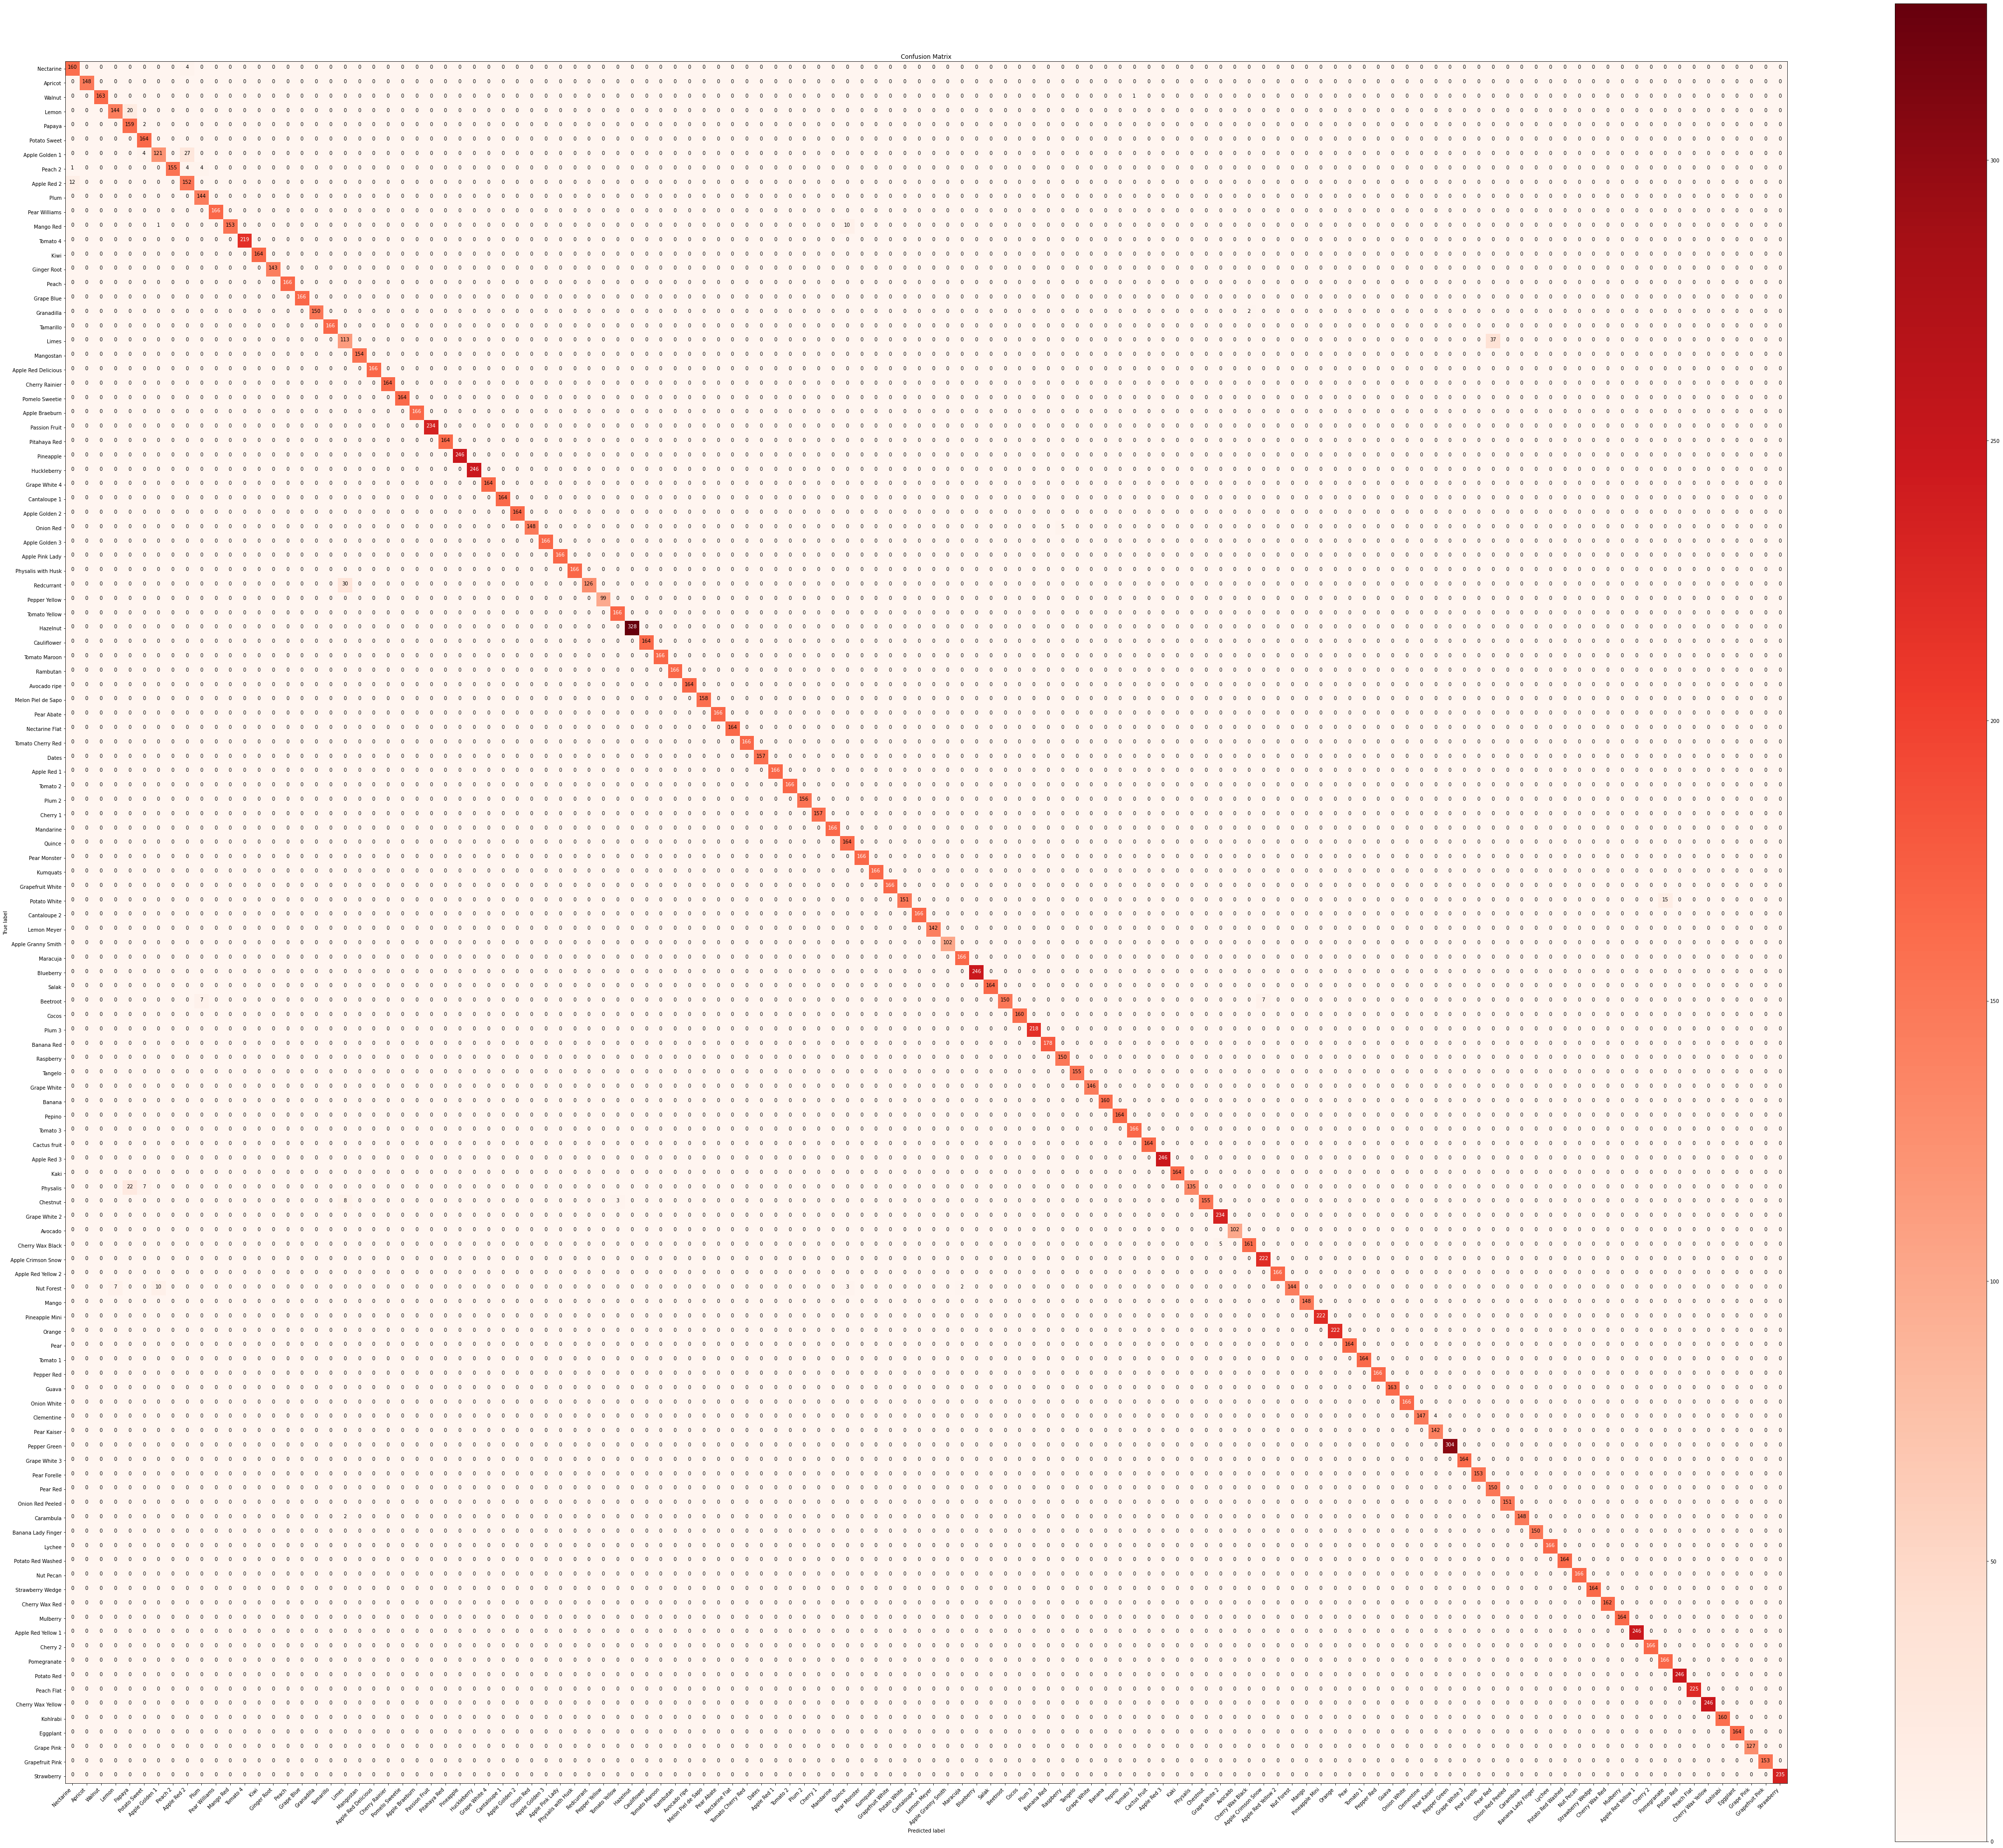

In [28]:
plot_cm(conf_mtx, class_names)

# Hyperparameter Optimization
Paremeters to optimize:
* $\epsilon$ learning rate
* $\epsilon$ Dropout Rate



In [0]:
pip install -U keras-tuner

     |████████████████████████████████| 61kB 2.0MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=114d767826ea33487d0256478647c984574125424ac79f7789e2eff4320315ed
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=47743f106b87c2f61f337355734149aa9f94438ee66d1f5ba0ef177ab76b9c3d
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [0]:
#Implementing HPO function to tune Hyperparameters of the model (learning rate,dropout)
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
def model_tuner(hp):
  base_model = applications.ResNet50(input_tensor=None,include_top=False, weights='imagenet', input_shape=(224,224,3))
  for layer in base_model.layers:
    layer.trainable=False
  top = base_model.output
  top = Flatten()(top)
  top = Dense(128, activation='relu')(top)
  top = Dropout(hp.Choice('rate',values=[0.2,0.3,0.4,0.5]))(top)
  predictor = Dense(120 ,kernel_regularizer=regularizers.l2(0.0001),activation='softmax')(top)
  ResNet50_definitive = Model(inputs=base_model.input, outputs=predictor)
  ResNet50_definitive.compile(optimizer=optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4,1e-5])), loss='categorical_crossentropy',metrics=['accuracy'])
  return ResNet50_definitive

tuner = RandomSearch(
    model_tuner,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory='/content/drive/My Drive/'
    )

In [0]:
tuner.search_space_summary()

In [0]:
tuner.search(train_batches,
             epochs=10,verbose=1,
             validation_data=val_batches, callbacks=[early_stopping,model_checkpoint])

Epoch 1/10
1514/1514 [==============================] - 918s 606ms/step - loss: 1.4159 - accuracy: 0.6778 - val_loss: 0.2220 - val_accuracy: 0.9538
Epoch 2/10
1514/1514 [==============================] - 912s 602ms/step - loss: 0.1900 - accuracy: 0.9597 - val_loss: 0.0879 - val_accuracy: 0.9844
Epoch 3/10
1514/1514 [==============================] - 913s 603ms/step - loss: 0.0850 - accuracy: 0.9851 - val_loss: 0.0735 - val_accuracy: 0.9822
Epoch 4/10
1514/1514 [==============================] - 927s 612ms/step - loss: 0.0544 - accuracy: 0.9912 - val_loss: 0.0525 - val_accuracy: 0.9905
Epoch 5/10
1514/1514 [==============================] - 925s 611ms/step - loss: 0.0381 - accuracy: 0.9945 - val_loss: 0.0446 - val_accuracy: 0.9902
Epoch 6/10
1514/1514 [==============================] - 927s 612ms/step - loss: 0.0325 - accuracy: 0.9960 - val_loss: 0.0566 - val_accuracy: 0.9867


Epoch 1/10
1514/1514 [==============================] - 918s 606ms/step - loss: 5.2326 - accuracy: 0.0170 - val_loss: 4.7816 - val_accuracy: 0.0162
Epoch 2/10
1514/1514 [==============================] - 912s 603ms/step - loss: 4.7973 - accuracy: 0.0167 - val_loss: 9.3883 - val_accuracy: 0.0165


Epoch 1/10
1514/1514 [==============================] - 884s 584ms/step - loss: 2.3664 - accuracy: 0.4194 - val_loss: 0.3912 - val_accuracy: 0.9215
Epoch 2/10
1514/1514 [==============================] - 818s 541ms/step - loss: 0.9379 - accuracy: 0.7269 - val_loss: 0.1227 - val_accuracy: 0.9706
Epoch 3/10
1514/1514 [==============================] - 852s 563ms/step - loss: 0.6345 - accuracy: 0.8044 - val_loss: 0.0940 - val_accuracy: 0.9770
Epoch 4/10
1514/1514 [==============================] - 881s 582ms/step - loss: 0.5063 - accuracy: 0.8443 - val_loss: 0.0708 - val_accuracy: 0.9811
Epoch 5/10
1514/1514 [==============================] - 879s 580ms/step - loss: 0.4195 - accuracy: 0.8691 - val_loss: 0.0584 - val_accuracy: 0.9840
Epoch 6/10
1514/1514 [==============================] - 863s 570ms/step - loss: 0.3669 - accuracy: 0.8848 - val_loss: 0.0669 - val_accuracy: 0.9820


INFO:tensorflow:Oracle triggered exit
